Epoch: 0
Accuracy on epoch 1: 0.9362833333333334
Epoch: 1
Accuracy on epoch 2: 0.9527166666666667
Epoch: 2
Accuracy on epoch 3: 0.9618166666666667
Epoch: 3
Accuracy on epoch 4: 0.96905
Epoch: 4
Accuracy on epoch 5: 0.97445
Epoch: 5
Accuracy on epoch 6: 0.9761333333333333
Epoch: 6
Accuracy on epoch 7: 0.97975
Epoch: 7
Accuracy on epoch 8: 0.9822833333333333
Epoch: 8
Accuracy on epoch 9: 0.985
Epoch: 9
Accuracy on epoch 10: 0.9861166666666666


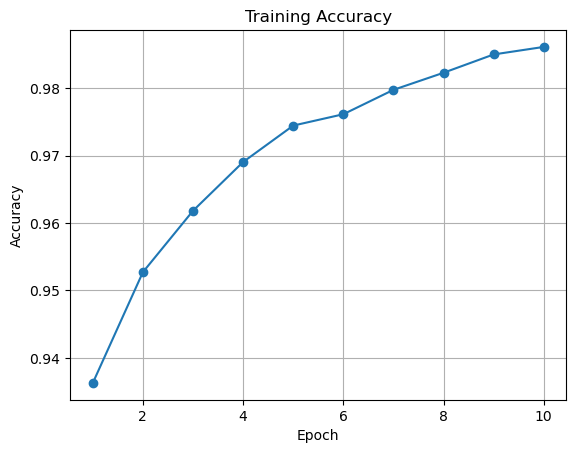

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the neural network class
class NN(nn.Module):
    def __init__(self, in_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(in_size, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load data
train_dataset = datasets.MNIST(root=r'D:\github repos\pytorch learning\Pytorch_Learning\PyTorch tutorials\00-quickstart/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Define input size and number of classes
in_size = 28 * 28
num_classes = 10

# Initialize the network
model = NN(in_size, num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Track accuracy during training
accuracy_list = []

# Train the model
for epoch in range(num_epochs):
    print(f"Epoch: {epoch}")
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        data = data.reshape(data.shape[0], -1) 

        scores = model(data)
        loss = criterion(scores, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Check accuracy after each epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in train_loader:
            data = data.to(device=device)
            targets = targets.to(device=device)
            data = data.reshape(data.shape[0], -1)

            scores = model(data)
            _, predicted = torch.max(scores, dim=1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)
    
    accuracy = correct / total
    accuracy_list.append(accuracy)
    print(f"Accuracy on epoch {epoch+1}: {accuracy}")

# Plot accuracy
plt.plot(range(1, num_epochs + 1), accuracy_list, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid(True)
plt.show()
